# FIN313 GBA JAN24
Group Number: 7

Group Members:

    Ernest Pek Jun Wei (B1981095) 
    Rachel Seah Wen Hui (K2082112)
    Lingesh Kumar Ravi Chandran ()
    Wu Jiawei ()
    
T Group: T02

Submission date: March 22nd 2024

# Question 1

In [1]:
from tensorflow import keras
from keras import models
from keras import layers
from keras.optimizers import RMSprop

**Downloading the 50,000 movie reviews from IMDB and saving half of the data as training data while the remaining half are saved as test data.**

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(seed=100, num_words=5000)

**Pre-processing the different length input data using one-hot encoding**

In [3]:
import numpy as np

def vectorize_seq(sequences, dimension=5000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_seq(train_data)
x_test =  vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## part (a)
**Implementing the designed neural network architecture**

In [4]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160032    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160705 (627.75 KB)
Trainable params: 160705 (627.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/10


49/49 [==============================] - 5s 79ms/step - loss: 0.4549 - accuracy: 0.8008 - val_loss: 0.3441 - val_accuracy: 0.8613
Epoch 2/10
49/49 [==============================] - 1s 13ms/step - loss: 0.2824 - accuracy: 0.8906 - val_loss: 0.2870 - val_accuracy: 0.8860
Epoch 3/10
49/49 [==============================] - 1s 11ms/step - loss: 0.2345 - accuracy: 0.9077 - val_loss: 0.2914 - val_accuracy: 0.8840
Epoch 4/10
49/49 [==============================] - 1s 11ms/step - loss: 0.2148 - accuracy: 0.9172 - val_loss: 0.2983 - val_accuracy: 0.8811
Epoch 5/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1876 - accuracy: 0.9293 - val_loss: 0.3843 - val_accuracy: 0.8566
Epoch 6/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1730 - accuracy: 0.9344 - val_loss: 0.3187 - val_accuracy: 0.8780
Epoch 7/10
49/49 [==============================] - 1s 11ms/step - loss: 0.1541 - accuracy: 0.9438 - val_loss: 0.3334 - val_accuracy: 0.8752
Epoch 8/10


## part (b)
**Reporting the model's training losses, testing losses, training accuracy, and testing accuracy**

In [8]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)

# Report the training and testing metrics
print(f'Training Loss: {history.history["loss"][-1]:.3f}')
print(f'Testing Loss: {test_loss:.3f}')

print(f'Training Accuracy: {history.history["accuracy"][-1]:.3f}')
print(f'Testing Accuracy: {test_acc:.3f}')

782/782 [==============================] - 2s 2ms/step - loss: 0.3779 - accuracy: 0.8700
Training Loss: 0.113
Testing Loss: 0.378
Training Accuracy: 0.962
Testing Accuracy: 0.870


**Findings:**<br>
The model achieves a high training accuracy of 95.4%, indicating effective learning from the training dataset.
The testing accuracy of 87.0% is slightly lower than the training accuracy but still reasonably high, suggesting good generalization to unseen data.
The difference between training and testing accuracy is not excessively large, indicating that the model is not overfitting or underfitting severely.<br>

## part (c)

**Using matplotlib to plot the training and validation loss, which can help identify the optimal number of epochs**

Epoch 1/30
49/49 [==============================] - 3s 51ms/step - loss: 0.4849 - accuracy: 0.7778 - val_loss: 0.3487 - val_accuracy: 0.8695
Epoch 2/30
49/49 [==============================] - 1s 11ms/step - loss: 0.2916 - accuracy: 0.8904 - val_loss: 0.2886 - val_accuracy: 0.8852
Epoch 3/30
49/49 [==============================] - 1s 11ms/step - loss: 0.2457 - accuracy: 0.9050 - val_loss: 0.2838 - val_accuracy: 0.8851
Epoch 4/30
49/49 [==============================] - 1s 11ms/step - loss: 0.2141 - accuracy: 0.9189 - val_loss: 0.2897 - val_accuracy: 0.8838
Epoch 5/30
49/49 [==============================] - 1s 11ms/step - loss: 0.1956 - accuracy: 0.9270 - val_loss: 0.2994 - val_accuracy: 0.8795
Epoch 6/30
49/49 [==============================] - 1s 11ms/step - loss: 0.1763 - accuracy: 0.9328 - val_loss: 0.3136 - val_accuracy: 0.8755
Epoch 7/30
49/49 [==============================] - 1s 11ms/step - loss: 0.1630 - accuracy: 0.9374 - val_loss: 0.3268 - val_accuracy: 0.8754
Epoch 8/30
49

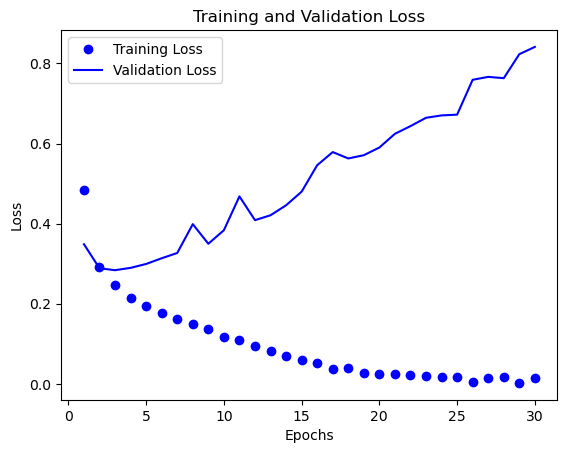

In [9]:
import matplotlib.pyplot as plt

# Define the model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with a validation set
history = model.fit(x_train, y_train,
                    epochs=30,  # adjust this value based on the plot
                    batch_size=512,
                    validation_data=(x_test, y_test))

# Plotting the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

After epoch 3, the validation loss starts to increase, which indicates that the model is beginning to overfit the training data. 

Therefore, epoch 3 appears to be a reasonable choice for the optimal number of epochs.

**Modifying the model training code to use early stopping based on the minimum validation loss and stop training if the validation loss does not improve**

In [10]:
# Train the model with early stopping based on validation loss
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=10,  #epochs=3 or a higher number if using early stopping
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/10
49/49 [==============================] - 2s 35ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.8931 - val_accuracy: 0.8612
Epoch 2/10
49/49 [==============================] - 1s 13ms/step - loss: 0.0173 - accuracy: 0.9956 - val_loss: 0.8610 - val_accuracy: 0.8598
Epoch 3/10
49/49 [==============================] - 1s 11ms/step - loss: 9.8300e-04 - accuracy: 1.0000 - val_loss: 0.9453 - val_accuracy: 0.8609
Epoch 4/10
49/49 [==============================] - 1s 11ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.8987 - val_accuracy: 0.8590
Epoch 5/10
49/49 [==============================] - 1s 11ms/step - loss: 7.3237e-04 - accuracy: 1.0000 - val_loss: 0.9777 - val_accuracy: 0.8614


## part (d)

One way to improve the model's performance is to introduce dropout regularization.

Dropout is a regularization technique where randomly selected neurons are ignored during training, which helps prevent overfitting.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the improved model
improved_model = Sequential()
improved_model.add(Dense(32, activation='relu', input_shape=(5000,)))
improved_model.add(Dropout(0.5))  # Adding dropout layer with a dropout rate of 0.5
improved_model.add(Dense(16, activation='relu'))
improved_model.add(Dropout(0.5))  # Adding dropout layer with a dropout rate of 0.5
improved_model.add(Dense(8, activation='relu'))
improved_model.add(Dropout(0.5))  # Adding dropout layer with a dropout rate of 0.5
improved_model.add(Dense(1, activation='sigmoid'))

# Compile the improved model
improved_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Train the improved model
improved_history = improved_model.fit(x_train, y_train,
                                      epochs=10,
                                      batch_size=512,
                                      validation_data=(x_test, y_test))

# Evaluate the improved model on the test data
improved_test_loss, improved_test_acc = improved_model.evaluate(x_test, y_test)

# Report the accuracy of the improved model
print(f'Improved Model Testing Accuracy: {improved_test_acc:.3f}')


Epoch 1/10
49/49 [==============================] - 3s 35ms/step - loss: 0.6727 - accuracy: 0.5691 - val_loss: 0.5879 - val_accuracy: 0.8101
Epoch 2/10
49/49 [==============================] - 1s 12ms/step - loss: 0.5761 - accuracy: 0.7119 - val_loss: 0.4462 - val_accuracy: 0.8563
Epoch 3/10
49/49 [==============================] - 1s 13ms/step - loss: 0.4919 - accuracy: 0.7790 - val_loss: 0.3654 - val_accuracy: 0.8773
Epoch 4/10
49/49 [==============================] - 1s 13ms/step - loss: 0.4349 - accuracy: 0.8284 - val_loss: 0.3189 - val_accuracy: 0.8827
Epoch 5/10
49/49 [==============================] - 1s 12ms/step - loss: 0.3900 - accuracy: 0.8551 - val_loss: 0.3104 - val_accuracy: 0.8836
Epoch 6/10
49/49 [==============================] - 1s 12ms/step - loss: 0.3660 - accuracy: 0.8715 - val_loss: 0.3072 - val_accuracy: 0.8828
Epoch 7/10
49/49 [==============================] - 1s 12ms/step - loss: 0.3327 - accuracy: 0.8845 - val_loss: 0.3032 - val_accuracy: 0.8840
Epoch 8/10
49

## part (e)

**Specificity: 40/45 = 66.67%**<br>
**Type I Error (False Positive, FP) False Positives=Predicted Positive, Actual Negative = 15**<br>
A type I error occurs when the model predicts a positive outcome (Positive, +), but the true status is negative (Negative, -).<br>
These are instances where the model incorrectly predicted a positive review, but the actual review was negative.<br>
*Implication:* This error might lead to misinforming users that a negative review is positive, potentially affecting their decision-making based on incorrect information.<br>

**Misleading Information:** Users rely on platforms like IMDb for accurate and reliable information about movies and TV shows. Misinforming users about the sentiment of a review could lead to misunderstandings and misinterpretations, affecting their decisions on whether to watch a particular content.<br>

**User Trust:** Trust is crucial for any online platform. If users find that the information provided by IMDb's AI is not reliable, it could erode their trust in the platform. Users may become skeptical about the accuracy of reviews and other content on IMDb, which can negatively impact the platform's reputation.<br>

**User Experience:** A key aspect of user experience is the ability to access trustworthy information. If users encounter inaccuracies in the sentiment analysis of reviews, it can lead to frustration and dissatisfaction. This may discourage users from using IMDb in the future or seeking alternative platforms for accurate information.<br><br>

**Sensitivity: 45/55 = 81.81%**<br>
**Type II Error (False Negative, FN) False Negatives=Predicted Negative, Actual Positive = 10**<br>
A type II error occurs when the model predicts a negative outcome (Negative, -), but the true status is positive (Positive, +).<br>
These are instances where the model incorrectly predicted a negative review, but the actual review was positive.<br>
*Implication:* This error might result in missing positive reviews, and users might not be aware of positive sentiments expressed in reviews.<br>

**Impact on Content Creators:** Filmmakers, actors, and other individuals involved in the entertainment industry often pay attention to audience feedback. Misinforming users about the sentiment of a review could have unintended consequences for content creators, as they may receive inaccurate feedback on their work.<br>

**Legal Issues:** If the misinformation leads to substantial harm or damages, it could potentially result in legal issues for IMDb. Content creators or users who rely on the platform might take legal action if they believe they have been adversely affected by the inaccuracies.<br><br>

In summary, type I and type II errors have different implications in the context of sentiment analysis. Type I errors may mislead users by falsely indicating positivity, while type II errors may lead to overlooking positive sentiments in reviews. The balance between these errors depends on the specific goals and priorities of the sentiment analysis application. A good sentiment analysis model should aim for high precision to minimize false positives (Type I errors) and high recall to minimize false negatives (Type II errors).

## part (f)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Reshape the data to 2D arrays as logistic regression expects
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Create and train the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=500)
logistic_regression_model.fit(x_train_flat, y_train)

# Make predictions on the test set
logistic_regression_predictions = logistic_regression_model.predict(x_test_flat)

# Evaluate the logistic regression model
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)

# Print the testing accuracy of the logistic regression model
print(f'Logistic Regression Testing Accuracy: {logistic_regression_accuracy:.3f}')


Logistic Regression Testing Accuracy: 0.858


### Logistic Regression: ###

Testing Accuracy: 0.858<br><br>
**Advantages:**<br>
Simplicity: Logistic regression is a simple linear model that is easy to understand and interpret.<br>
Computationally Efficient: Logistic regression is computationally less expensive compared to neural networks, making it faster for training and prediction.<br><br>
**Disadvantages:**<br>
Limited Complexity: Logistic regression may struggle to capture complex relationships in the data, especially when dealing with non-linear patterns.

### Neural Network (Improved Model): ###
Testing Accuracy: 0.880<br><br>
**Advantages:**<br>
Non-Linearity: Neural networks, especially with multiple layers, can capture complex non-linear relationships in the data.<br>
Feature Learning: Neural networks automatically learn hierarchical representations of features, potentially improving performance on intricate tasks.<br><br>
**Disadvantages:**<br>
Complexity: Neural networks are more complex and may require more computational resources for training. They can also be harder to interpret.


### Comparison: ###
The neural network, with an improved testing accuracy of 0.880, outperforms logistic regression (0.858) in terms of predictive accuracy.<br>
The neural network's ability to capture non-linear patterns might be crucial in sentiment analysis, where the relationships between words and sentiments can be intricate.<br>
The decision to choose between logistic regression and a neural network depends on various factors such as the available computational resources, interpretability, and the specific requirements of the application.

### Conclusion: ###
If computational efficiency and interpretability are critical, and the slightly lower accuracy is acceptable, logistic regression could be a reasonable choice.<br>
If achieving the highest possible accuracy is a priority, and computational resources are sufficient, the neural network might be the preferred option due to its ability to handle complex relationships in the data.

# Question 2

## part (a)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
# Input data
data = [
    [9567, 6488, 0, 2, 'Good'],
    [10767, 5194, 1, 1, 'Good'],
    [9317, 7066, 1, 2, 'Good'],
    [10517, 3550, 1, 3, 'Good'],
    [11267, 7847, 1, 3, 'Good'],
    [4500, 2356, 0, 0, 'Bad'],
    [5786, 3255, 0, 0, 'Bad'],
    [10235, 6800, 1, 2, 'Good'],
    [9800, 2345, 0, 1, 'Bad'],
    [4300, 1456, 1, 1, 'Bad'],
    [6788, 2002, 0, 1, 'Good'],
    [8765, 2305, 1, 1, 'Bad'],
    [11235, 4050, 0, 2, 'Good'],
    [13400, 3500, 0, 1, 'Good'],
    [4567, 1204, 1, 1, 'Bad'],
    [6734, 2038, 1, 1, 'Good'],
    [8546, 3150, 1, 2, 'Bad'],
    [7893, 3020, 1, 1, 'Bad'],
    [10123, 3809, 0, 1, 'Good'],
    [8801, 5600, 0, 3, 'Good'],
]

# Extract features and labels
X = [[row[0], row[1], row[2], row[3]] for row in data]
y = [row[4] for row in data]

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=4, random_state=42, shuffle=False)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = knn_classifier.predict(X_val)

# Decode predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on the validation dataset: {accuracy:.2f}")



Accuracy on the validation dataset: 0.75


## part (b)

**1. Feature Scaling** <br>
KNN is sensitive to the scale of the input features because it relies on distance measures. When features have different scales, those with larger scales may dominate the distance calculations.

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Feature scaling using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initializing the KNN classifier with K=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Training the model on the scaled training dataset
knn_classifier.fit(X_train_scaled, y_train)

# Making predictions on the scaled validation dataset
y_pred = knn_classifier.predict(X_val_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_val, y_pred)

print(f"Accuracy on the validation dataset after feature scaling: {accuracy}")

Accuracy on the validation dataset after feature scaling: 0.5


**2. Feature Selection**<br>
Identify and use only the most relevant features for classification. Removing irrelevant or redundant features can improve the model's generalization.

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use SelectKBest with ANOVA F-statistic for feature selection
k_best = SelectKBest(score_func=f_classif, k=3)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_valid_selected = k_best.transform(X_val)

# Implement the KNN classifier with selected features and K=3
knn_selected = KNeighborsClassifier(n_neighbors=3)
knn_selected.fit(X_train_selected, y_train)

# Predict on the selected features validation set
y_pred_selected = knn_selected.predict(X_valid_selected)

# Calculate accuracy with selected features
accuracy_selected = accuracy_score(y_val, y_pred_selected)
print("Accuracy with Selected Features:", accuracy_selected)


Accuracy with Selected Features: 0.75


**3. Ensemble Methods (Bagging)**<br>
Using ensemble methods like Bagging or Boosting with KNN. This involves training multiple KNN models and combining their predictions, which can lead to better overall performance.

In [17]:
from sklearn.ensemble import BaggingClassifier

# Implement Bagging with KNN (K=3)
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), n_estimators=10, random_state=42)
bagging_knn.fit(X_train, y_train)

# Predict on the validation set using Bagging
y_pred_bagging = bagging_knn.predict(X_val)

# Calculate accuracy with Bagging
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print("Accuracy with Bagging:", accuracy_bagging)


Accuracy with Bagging: 0.75


**4. Dimensionality Reduction (PCA)**<br>
Apply dimensionality reduction techniques, such as Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE), to reduce the number of features while preserving the most important information.

In [18]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_val)

# Implement the KNN classifier with reduced dimensions and K=3
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Predict on the PCA-transformed validation set
y_pred_pca = knn_pca.predict(X_valid_pca)

# Calculate accuracy with reduced dimensions
accuracy_pca = accuracy_score(y_val, y_pred_pca)
print("Accuracy with PCA:", accuracy_pca)


Accuracy with PCA: 0.75


**5. Cross Validation**<br>
Use cross-validation to assess the model's generalization performance more effectively. This can help detect overfitting and provide a more accurate estimate of the model's performance.

In [19]:
from sklearn.model_selection import cross_val_score

# Create a KNN classifier with the best hyperparameters (from tuning)
best_knn_cv = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_knn_cv, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)


Cross-Validation Scores: [1.   0.75 1.   1.   0.75]
Mean Accuracy: 0.9


**6. Fine-Tuning Hyperparameters**<br>
Experiment with different values of hyperparameters other than k, such as the distance metric. Sometimes, a different distance metric or a different weighting scheme might lead to better results


In [20]:
# Try different values of the p parameter for distance metric
knn_manhattan = KNeighborsClassifier(n_neighbors=3, p=1)
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_val_scaled)
accuracy_manhattan = accuracy_score(y_val, y_pred_manhattan)
print(f"Accuracy with Manhattan distance: {accuracy_manhattan}")

knn_euclidean = KNeighborsClassifier(n_neighbors=3, p=2)
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_val_scaled)
accuracy_euclidean = accuracy_score(y_val, y_pred_euclidean)
print(f"Accuracy with Euclidean distance: {accuracy_euclidean}")


Accuracy with Manhattan distance: 0.75
Accuracy with Euclidean distance: 0.5


**7. Handling Imbalanced Classes**<br>
Using the class_weight parameter to handle imbalanced classes.

In [21]:
from sklearn.utils import class_weight

# Handling class imbalance using class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
knn_class_weights = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')
knn_class_weights.fit(X_train_scaled, y_train)
y_pred_class_weights = knn_class_weights.predict(X_val_scaled)
accuracy_class_weights = accuracy_score(y_val, y_pred_class_weights)
print(f"Accuracy with class weights: {accuracy_class_weights}")

Accuracy with class weights: 0.75


**8. Using Different Data Splits**<br>
Trying a different random seed for the data split

In [22]:
# Try a different random seed for data split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=4, random_state=456, shuffle=False)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = knn_classifier.predict(X_val)

# Decode predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on the validation dataset: {accuracy:.2f}")

Accuracy on the validation dataset: 0.75


## part (c)

### KNN:
<u>**Pros:**</u><br>
- Simple and easy to understand.<br>
- No training phase; the model is instance-based.<br>
- Can work well with smaller datasets.<br>
- Intuitive approach for classification tasks with clear clusters.<br>

<u>**Cons:**</u><br>
- Computationally expensive during prediction, especially with large datasets.<br>
- Sensitive to irrelevant or redundant features.
- Might not perform well in high-dimensional spaces.<br><br>
    

### Neural Network:
<u>**Pros:**</u><br>
- Can capture complex relationships in data.<br>
- Suitable for high-dimensional spaces and complex patterns.<br>
- Capable of learning hierarchical features.<br>
- Can automatically learn feature representations.<br>

<u>**Cons:**</u><br>
- Requires a larger amount of data for training to avoid overfitting.<br>
- Training can be computationally expensive.<br>
- Model interpretation can be challenging.<br><br>
    
### Considerations
<u>**Dataset Size**</u><br>
If we have a relatively small dataset, KNN might perform reasonably well. Neural networks often require more data to generalize effectively.<br>

<u>**Complexity of Relationships**</u><br>
If the relationship between features and labels is complex and nonlinear, a neural network might be more suitable, as it can learn intricate patterns.<br>

<u>**Computational Resources**</u><br>
KNN is computationally expensive during prediction, especially with large datasets. If computational resources are limited, a neural network might be more scalable.<br>

<u>**Interpretability**</u><br>
If interpretability is crucial and a clear understanding of how predictions are made is required, KNN might be more transparent. Neural networks are often considered as "black-box" models.<br>

<u>**Feature Importance**</u><br>
If we want to understand the importance of individual features, KNN provides a straightforward way to observe the influence of each feature. Neural networks might not provide such transparency.
In the context of the problem, considering the relatively small dataset, KNN has shown decent performance. However, if the relationships in the data are more complex and we have enough data, a neural network might be worth exploring. Additionally, if interpretability is essential, KNN could be a more straightforward choice. 